In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


In [2]:
tweets_df = pd.read_csv("../input/pfizer-vaccine-tweets/vaccination_tweets.csv")

In [3]:
tweets_df[0:15]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [4]:
len(tweets_df)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


In [5]:
#NULL values check
tweets_df.isna().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

Text(0, 0.5, 'Count of users')

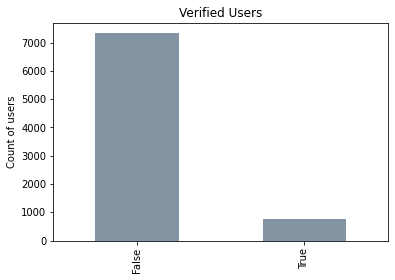

In [6]:
#Plot of verified users vs un-verified users
import matplotlib.pyplot as plt
import pandas as pd
pd.value_counts(tweets_df['user_verified']).plot.bar(color=(0.2,0.3,0.4,0.6))
plt.title("Verified Users")
plt.ylabel("Count of users")


In [27]:
#Top 20 users with highest tweets
df1=tweets_df.groupby(by=['user_name'],as_index=False)['text'].count()
df1=df1.sort_values('text').reset_index()

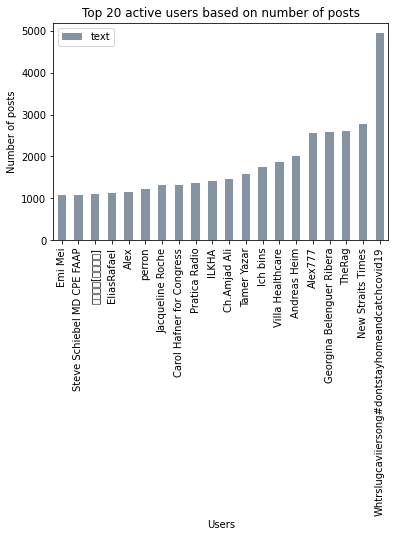

In [28]:
df1=df1[-20:]
df1.plot(x='user_name',y='text',kind='bar',color=(0.2,0.3,0.4,0.6))
plt.xlabel('Users')
plt.title('Top 20 active users based on number of posts')
plt.ylabel('Number of posts')
plt.show()

In [9]:
#Monthly number of tweets
tweets_df['timestamp'] = tweets_df['date'].apply(lambda x : pd.to_datetime(str(x)))
tweets_df['Month']=tweets_df['timestamp'].dt.month
tweets_df['date']=tweets_df['timestamp'].dt.date

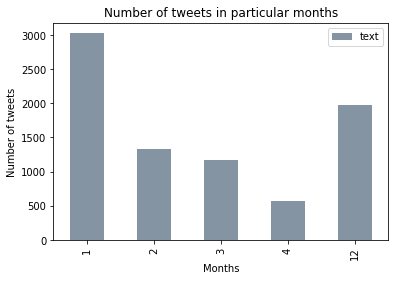

In [10]:
df1=tweets_df.groupby(by=['Month'],as_index=False)['text'].count()
df1=df1.sort_values('Month')
df1.plot(x='Month',y='text',kind='bar',color=(0.2,0.3,0.4,0.6))
plt.xlabel('Users')
plt.title('Number of tweets in particular months')
plt.ylabel('Number of tweets')
plt.xlabel("Months")
plt.show()

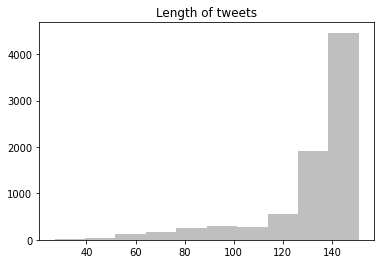

In [11]:

plt.hist(tweets_df['text'].str.len(),alpha=0.5,facecolor='grey')
plt.title("Length of tweets")
plt.show()

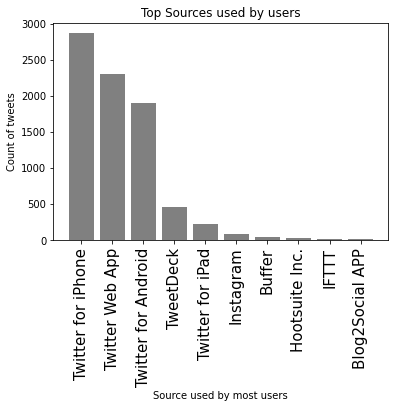

In [12]:
#USER SOURCES
s=tweets_df['source'].value_counts().reset_index()
s.columns=['source','total_count']
s=s.sort_values(['total_count'],ascending=False)
plt.bar(s.head(10)['source'],s.head(10)['total_count'],color='grey')
plt.ylabel("Count of tweets")
plt.xlabel("Source used by most users")
plt.title("Top Sources used by users")
plt.xticks(rotation=90,fontsize=15)
plt.show()
#Observation: Top is Twitter for Iphone

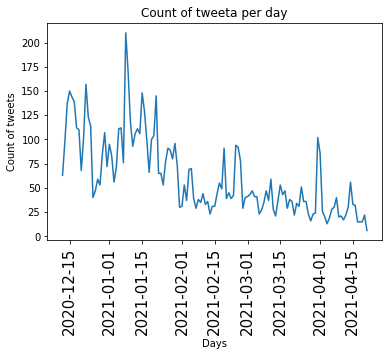

In [13]:
#PER DAY TWEETS
tweets_df['tweet_date']=pd.to_datetime(tweets_df['date']).dt.date
tweet_date=tweets_df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=True)
plt.plot(tweet_date['date'],tweet_date['count'])
plt.title("Count of tweeta per day")
plt.ylabel("Count of tweets")
plt.xlabel("Days")
plt.xticks(rotation=90,fontsize=15)
plt.show()

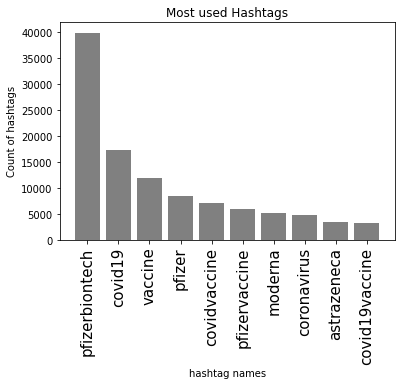

In [16]:
#Most used hashtags
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

tweets_df = tweets_df.copy()
tweets_df['hashtag'] = tweets_df['hashtags'].apply(lambda row : split_hashtags(row))
tweets_df = tweets_df.explode('hashtag')
tweets_df['hashtag'] = tweets_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
tweets_df.loc[tweets_df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'

df1 = tweets_df['hashtag'].value_counts().reset_index()
df1.columns = ['hashtag', 'count']
df1 = df1.sort_values(['count'],ascending=False)

plt.bar(df1.head(10)['hashtag'],df1.head(10)['count'],color='grey')
plt.ylabel("Count of hashtags")
plt.xlabel("hashtag names")
plt.title("Most used Hashtags")
plt.xticks(rotation=90,fontsize=15)
plt.show()

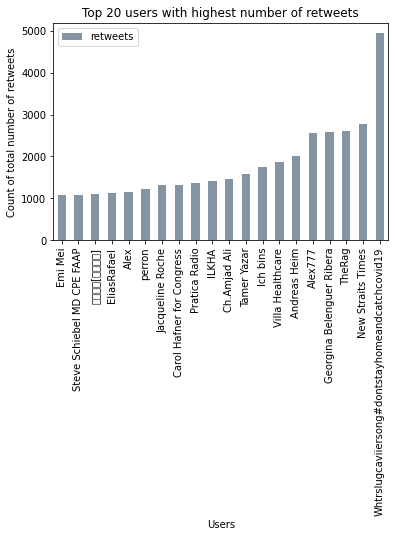

In [25]:
#Top 20 users with highest retweets
df1=tweets_df.groupby(by=['user_name'],as_index=False)['retweets'].count()
df1=df1.sort_values('retweets').reset_index()
df1=df1[-20:]
df1.plot(x='user_name',y='retweets',kind='bar',color=(0.2,0.3,0.4,0.6))
plt.xlabel('Users')
plt.title('Top 20 users with highest number of retweets')
plt.ylabel('Count of total number of retweets')
plt.show()